In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

In [ ]:
# load the dataset
data = pd.read_csv("D:\\Dhabe_Research\mc.csv")
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]
print(X)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


In [ ]:
def min_max_normalization(data, minimum=0, maximum=1):
    for i in range(data.shape[1]):
        col = data[:, i]
        x_min = np.min(col)
        x_max = np.max(col)
        data[:, i] = minimum + ((col - x_min) * (maximum - minimum)) / (x_max - x_min)
    return data

from sklearn.preprocessing import minmax_scale

# apply min-max normalization
X_scaled = minmax_scale(X, feature_range=(0, 1))

# convert the numpy array back to a dataframe
#X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled)

[[0.         0.3877551 ]
 [0.         0.81632653]
 [0.00819672 0.05102041]
 [0.00819672 0.7755102 ]
 [0.01639344 0.39795918]
 [0.01639344 0.76530612]
 [0.02459016 0.05102041]
 [0.02459016 0.94897959]
 [0.03278689 0.02040816]
 [0.03278689 0.7244898 ]
 [0.03278689 0.13265306]
 [0.03278689 1.        ]
 [0.04098361 0.14285714]
 [0.04098361 0.7755102 ]
 [0.04098361 0.12244898]
 [0.04098361 0.79591837]
 [0.04918033 0.34693878]
 [0.04918033 0.66326531]
 [0.06557377 0.28571429]
 [0.06557377 0.98979592]
 [0.07377049 0.34693878]
 [0.07377049 0.73469388]
 [0.08196721 0.04081633]
 [0.08196721 0.73469388]
 [0.10655738 0.13265306]
 [0.10655738 0.82653061]
 [0.10655738 0.31632653]
 [0.10655738 0.6122449 ]
 [0.1147541  0.30612245]
 [0.1147541  0.87755102]
 [0.12295082 0.03061224]
 [0.12295082 0.73469388]
 [0.14754098 0.03061224]
 [0.14754098 0.92857143]
 [0.14754098 0.13265306]
 [0.14754098 0.81632653]
 [0.1557377  0.16326531]
 [0.1557377  0.73469388]
 [0.18032787 0.25510204]
 [0.18032787 0.75510204]


In [ ]:
k=5

In [ ]:
# initialize centroids randomly
centroids = np.random.rand(k, X_scaled.shape[1])

# initialize weights as an empty array
weights = np.zeros((X_scaled.shape[0], k))

In [ ]:
for i in range(20):
    # calculate the distance between each data point and the centroids
    distances = np.linalg.norm(X_scaled[:, np.newaxis] - centroids, axis=2)

    # assign each data point to the closest centroid
    clusters = np.argmin(distances, axis=1)

    # calculate the reciprocal of the distance between each data point and the centroid of the cluster
    for j in range(k):
        weights[clusters == j, j] = 1 / distances[clusters == j, j]

    # calculate the weighted average of the data points in each cluster to update the centroids
    for j in range(k):
        if np.sum(weights[clusters == j, j]) != 0:
            centroids[j] = np.average(X_scaled[clusters == j], axis=0, weights=weights[clusters == j, j])

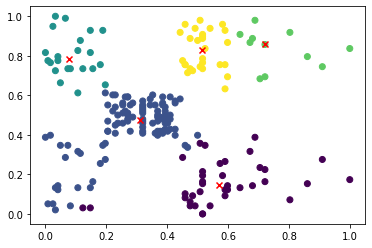

In [ ]:
# Plot the results
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", score)

Silhouette Score: 0.458247911576713
